# __Identification of the DFN connected structure and backbone__

### Problem statement
In fracture networks, some fractures do not have a contribution to the flow. These fractures are part of unconnected clusters or dead-ends. 
<br>
In this tutorial, we present how you can remove these structures from a DFN before solving the flow.

### Theoretical background
A DFN has often several clusters, i.e. several groups of fractures disconnected from each other.
Removing the clusters that are not connected to any hydraulic boundary condition is compulsory prior to solving the flow.
<br>
Dead-ends are ensemble of fractures connected to the main structure by a unique intersection and do not contribute to the flow. They can also be removed to fasten the flow solving. The remaining structure is called the backbone.

### What will you learn ?
- Identify the different clusters of a DFN.
- Select the connected clusters of a DFN (compulsory before solving the flow).
- Remove the dead-ends of the connected clusters. 

### DFN.Lab model

The identification of the connected structure and backbone is done by building a graph of fractures (see tutorial __013-Graphs__). 
Knowledge about boundary conditions are required (see tutorial __007-Boundary_conditions_for_flow__).
<br>
The required modules are __Basis__, __BoundaryCondition__ and __Graphs__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization of generated networks in our notebook.

## Example 1: Backbone identification in permeameter conditions

We importe the DFN and add the boundary conditions:

In [1]:
import dfnlab.Basis as basis
import os

path = os.getcwd()

the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=100.)
fnet = basis.DFN(the_system)
basis.load_disk_file(fnet, path+'/sources/dfnConnectedStructures.disk')
fnet.cleanDFN()
fnet.computeIntersections()  

import dfnlab.BoundaryCondition as bc

boundaries = bc.DomainBoundaryCondition()
boundaries.setPermeameterCondition(fnet,10,2) #head gradient = 10, along y axis (2)

To identify the DFN different clusters, connected structure, and backbone, you must build a fracture graph.

In [2]:
import dfnlab.Graphs as graphs

fgraph = graphs.DFNFractureGraph()
fgraph.create(fnet)
fgraph.addBoundaries(boundaries)

#### Clusters identification

The function __computeClusters__ automatically add cluster indices to the DFN fractures. 

4982


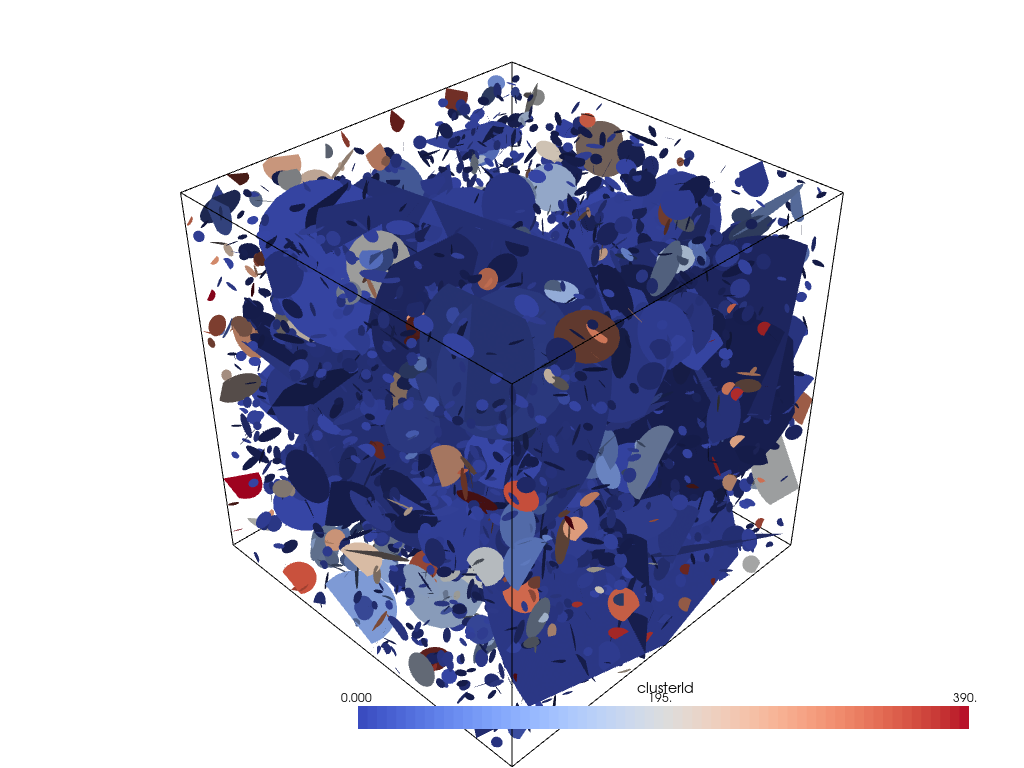

In [3]:
fgraph.computeClusters("clusterId")

from sources.functions import plot_dfn

pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)

print(fnet.nbFractures())
plot_dfn(fnet,pathFolder+"/dfn","clusterId")

#### Selection of the connected clusters

The function __keepConnectedClusters__ selects clusters connected to both dirichlet boundary conditions.

In [4]:
fgraph.keepConnectedClusters()
dfn_connected = fgraph.createDFN(update = True)
dfn_connected.computeIntersections()

#### Selection of the backbone

The function __keepBackbone__ removes deads ends, i.e. iterativelly fractures having one intersection with an other fracture.

In [5]:
fgraph.keepBackbone()
dfn_backbone = fgraph.createDFN(update = True)
dfn_backbone.computeIntersections()

Note that each of these three function can work without calling the others.

Fracture number in full dfn: 4982
Fracture number in connected dfn: 882
Fracture number in connected dfn: 311


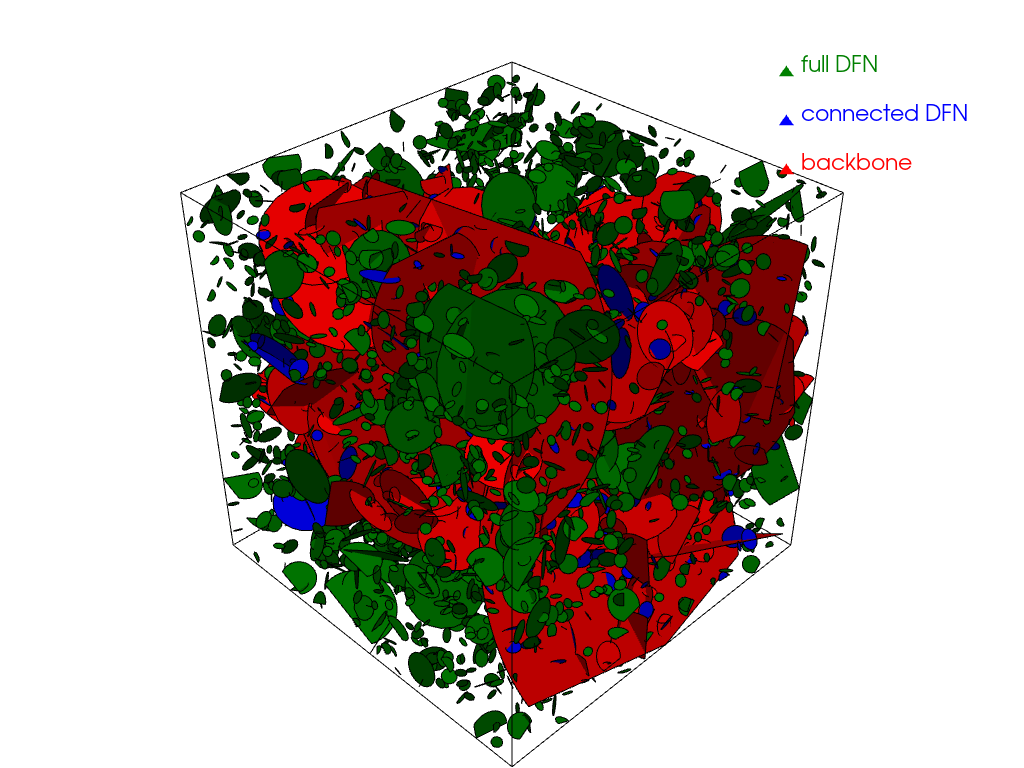

In [6]:
print('Fracture number in full dfn: '+str(fnet.nbFractures()))
print('Fracture number in connected dfn: '+str(dfn_connected.nbFractures()))
print('Fracture number in connected dfn: '+str(dfn_backbone.nbFractures()))

from sources.functions import plot_dfn_structures

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
plot_dfn_structures(fnet,dfn_connected, dfn_backbone, pathFolder)

## Example 2: Backbone identification with boundary conditions on two wells

This example is similar to the previous one, except that dirichlet boundary conditions are applyed on two wells, instead of on two borders of the system.

In [7]:
import dfnlab.Basis as basis
import os

path = os.getcwd()

the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=100.)
fnet = basis.DFN(the_system)
basis.load_disk_file(fnet, path+'/sources/dfnConnectedStructures.disk')

4982

We recall that the function computeIntersection() must be called after creating the wells. 

In [8]:
borehole1 = basis.Well1D([0,-20,50], [0,-20,-50]) 
borehole2 = basis.Well1D([0,+20,50], [0,+20,-50]) 
the_system.addGeometry(borehole1) 
the_system.addGeometry(borehole2) 

fnet.computeIntersections()  

import dfnlab.BoundaryCondition as bc

boundaries = bc.DomainBoundaryCondition()
boundaries.setWellInBC(dfn=fnet, P=10, well=borehole1)
boundaries.setWellInBC(dfn=fnet, P=-10, well=borehole2)

In [9]:
import dfnlab.Graphs as graphs

fgraph = graphs.DFNFractureGraph()
fgraph.create(fnet)
fgraph.addBoundaries(boundaries)

In [10]:
fgraph.keepConnectedClusters()
dfn_connected = fgraph.createDFN()

In [11]:
fgraph.keepBackbone()
dfn_backbone = fgraph.createDFN()

Fracture number in full dfn: 4982
Fracture number in connected dfn: 882
Fracture number in backbone: 300


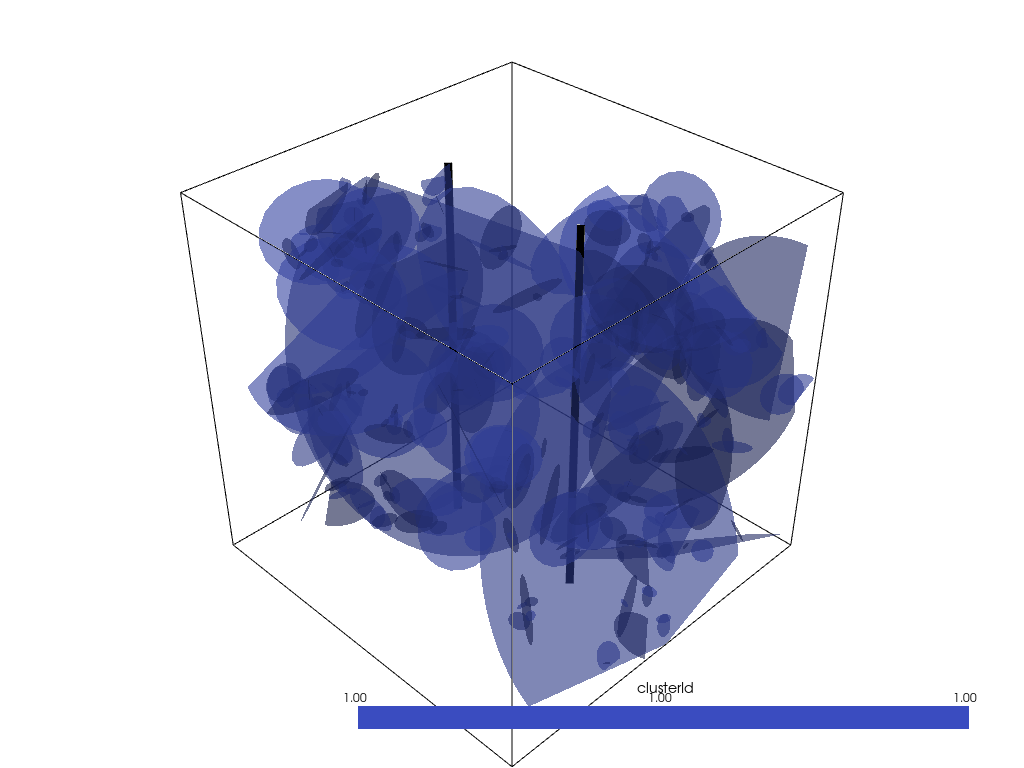

In [12]:
print('Fracture number in full dfn: '+str(fnet.nbFractures()))
print('Fracture number in connected dfn: '+str(dfn_connected.nbFractures()))
print('Fracture number in backbone: '+str(dfn_backbone.nbFractures()))

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
from sources.functions import plot_dfn_and_wells
fgraph.computeClusters("clusterId")
plot_dfn_and_wells(dfn_backbone, pathFolder+"/dfn_and_wells", value='clusterId')